# Indice de contenido de clorofilas : ICC

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Read the Excel sheet
UV180 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV180', parse_dates=['H'])
UV250 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV250', parse_dates=['H'])
UV395 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV395', parse_dates=['H'])


df = pd.concat([UV180, UV250, UV395], ignore_index=True)


# Remove the '°C' suffix from the 'Temperatura' column
df['Temperatura'] = df['Temperatura'].str.replace('°C', '')

df['Temperatura']= df['Temperatura'].astype('float')

# Display the dataframe
print(df.head())

   Temperatura    Hr      UV  DIA          H  Muestra     T1     T9
0         15.0  0.79  180 nm    1 2023-08-27        1  280.8  274.6
1         15.0  0.79  180 nm    1 2023-08-27        2  243.2  280.4
2         15.0  0.79  180 nm    1 2023-08-27        3  242.6  265.0
3         15.0  0.79  180 nm    1 2023-08-27        4  251.6  274.1
4         15.0  0.79  180 nm    1 2023-08-27        5  247.6  249.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   float64       
 1   Hr           1215 non-null   float64       
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   datetime64[ns]
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 76.1+ KB


In [19]:
df['H']= df['H'].dt.time

In [20]:
df['H'].unique()

array([datetime.time(0, 0), datetime.time(5, 0), datetime.time(10, 0),
       datetime.time(15, 0), datetime.time(20, 0), datetime.time(1, 0),
       datetime.time(6, 0), datetime.time(11, 0), datetime.time(16, 0),
       datetime.time(21, 0), datetime.time(2, 0), datetime.time(7, 0),
       datetime.time(12, 0), datetime.time(17, 0), datetime.time(22, 0)],
      dtype=object)

In [21]:
# Combine 'day' and 'hour' into a single datetime column
df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time'], format='%d %H:%M:%S')


df.head()


Temperatura    Hr      UV  DIA         H  Muestra     T1     T9       Time
0         15.0  0.79  180 nm    1  00:00:00        1  280.8  274.6 1900-01-01
1         15.0  0.79  180 nm    1  00:00:00        2  243.2  280.4 1900-01-01
2         15.0  0.79  180 nm    1  00:00:00        3  242.6  265.0 1900-01-01
3         15.0  0.79  180 nm    1  00:00:00        4  251.6  274.1 1900-01-01
4         15.0  0.79  180 nm    1  00:00:00        5  247.6  249.2 1900-01-01

In [11]:
len(df['Time'].unique())

15

In [36]:
df['UV'].value_counts()

250 nm    405
395 nm    405
180 nm    405
Name: UV, dtype: int64

In [41]:
print(df['UV'].unique())
print(df['DIA'].unique())
print(df['Muestra'].unique())

['180 nm' '250 nm' '395 nm']
[1 2 3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


In [34]:
df[['Temperatura', 'Hr', 'T1','T9']].describe()

Temperatura           Hr           T1           T9
count  1215.000000  1215.000000  1215.000000  1215.000000
mean     14.246667     0.729400   225.888642   241.781811
std       3.054678     0.119549    84.437622    60.501606
min       9.500000     0.530000    10.200000    76.300000
25%      11.200000     0.610000   193.200000   206.750000
50%      14.700000     0.750000   241.200000   248.600000
75%      17.000000     0.840000   247.600000   267.250000
max      20.000000     0.910000   737.000000   763.800000

Text(0.5, 1.0, 'Material T1')

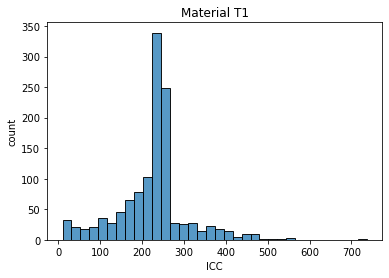

In [45]:
sns.histplot(data= df, x='T1', bins=int(np.sqrt(len(df)))) #binwidth=1)
plt.xlabel('ICC')
plt.ylabel('count')
plt.title('Material T1')

In [12]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars="UV", value_vars=["T1", "T9"], var_name="Clase", value_name="Value")

Text(0.5, 1.0, 'Combined Boxplot')

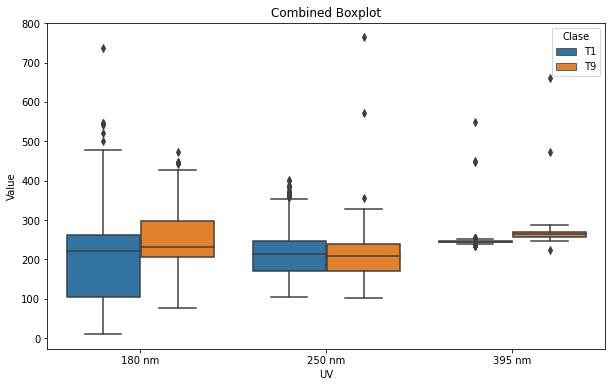

In [13]:
# Create a combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x="UV", y="Value", hue="Clase")
plt.title("Combined Boxplot")

<AxesSubplot:xlabel='T1', ylabel='Count'>

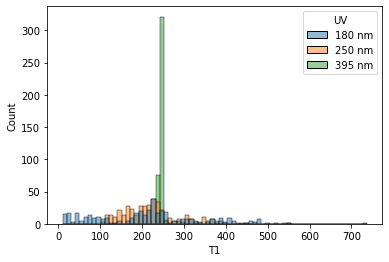

In [14]:
sns.histplot(data=df, x="T1", hue="UV")

<AxesSubplot:xlabel='T9', ylabel='Count'>

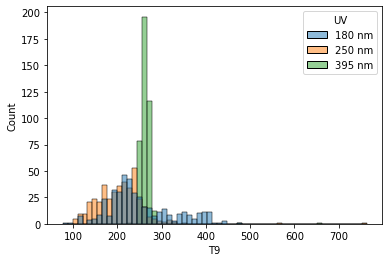

In [15]:
sns.histplot(data=df, x="T9", hue="UV")

sns.relplot(
    data=df[df['UV']=='180 nm'], x="Time", y="T1",
    col="Muestra",
    kind="scatter"
)

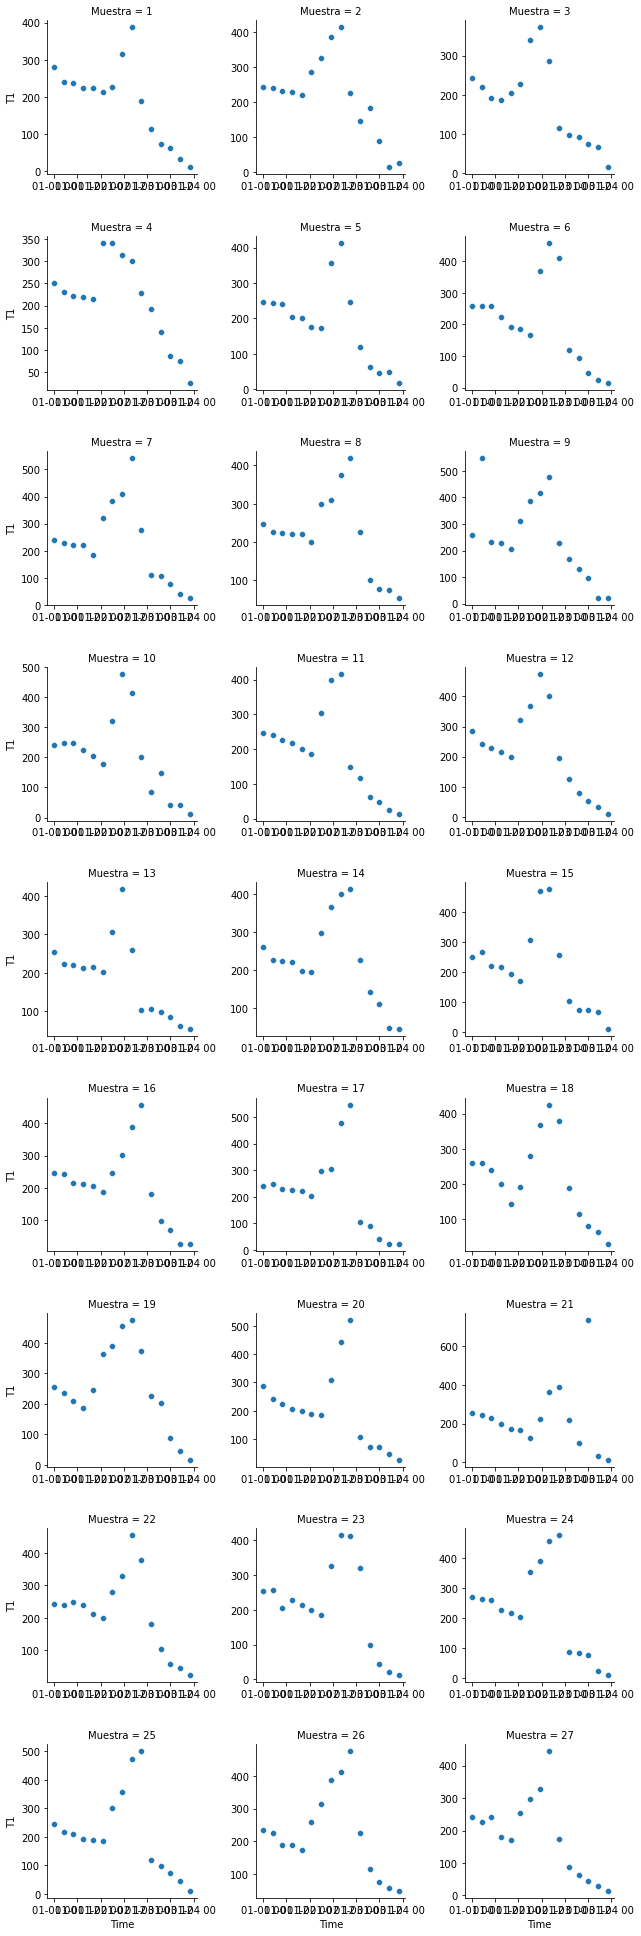

In [16]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='180 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()


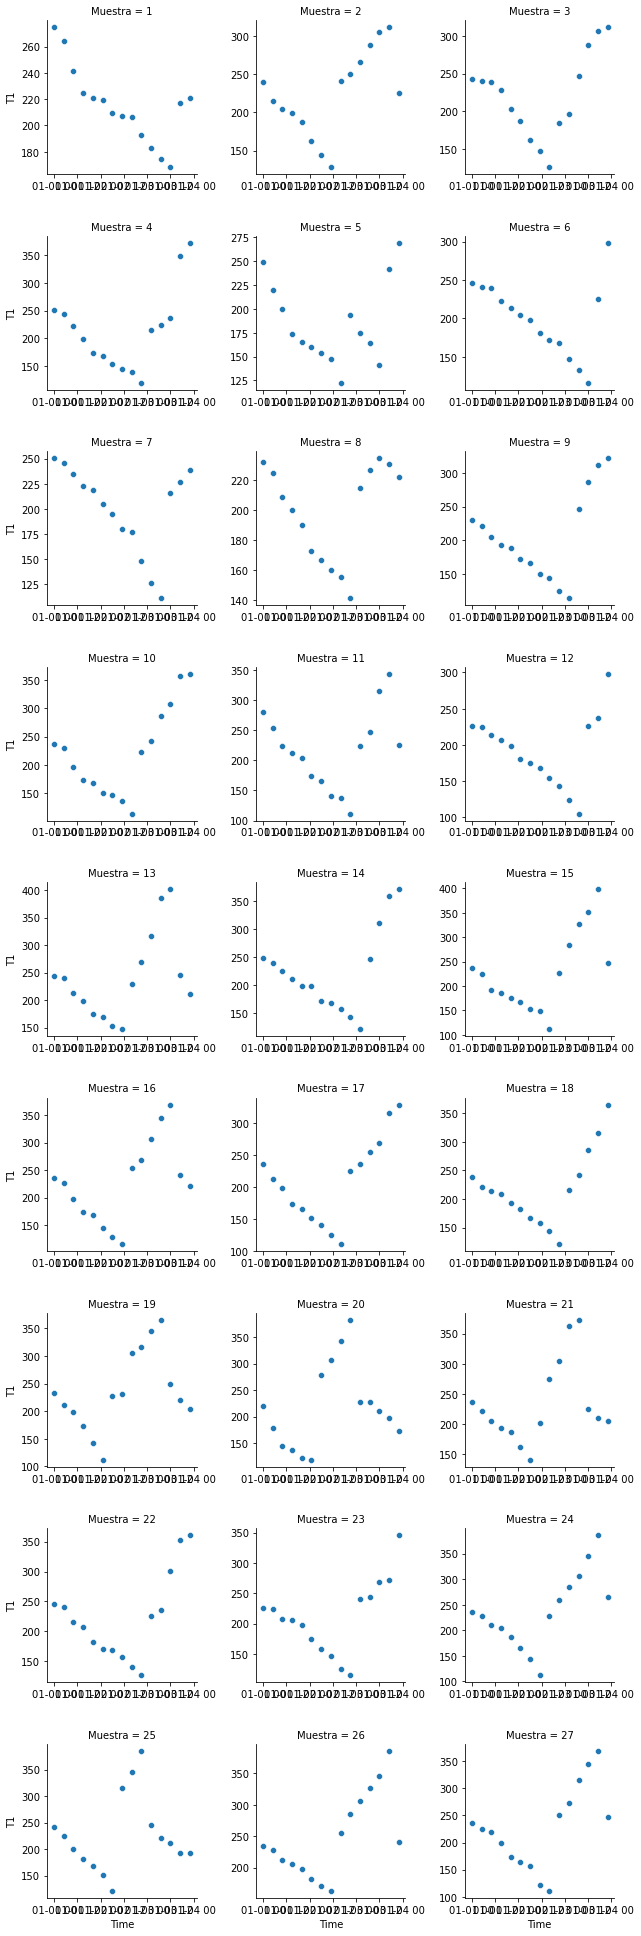

In [17]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='250 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

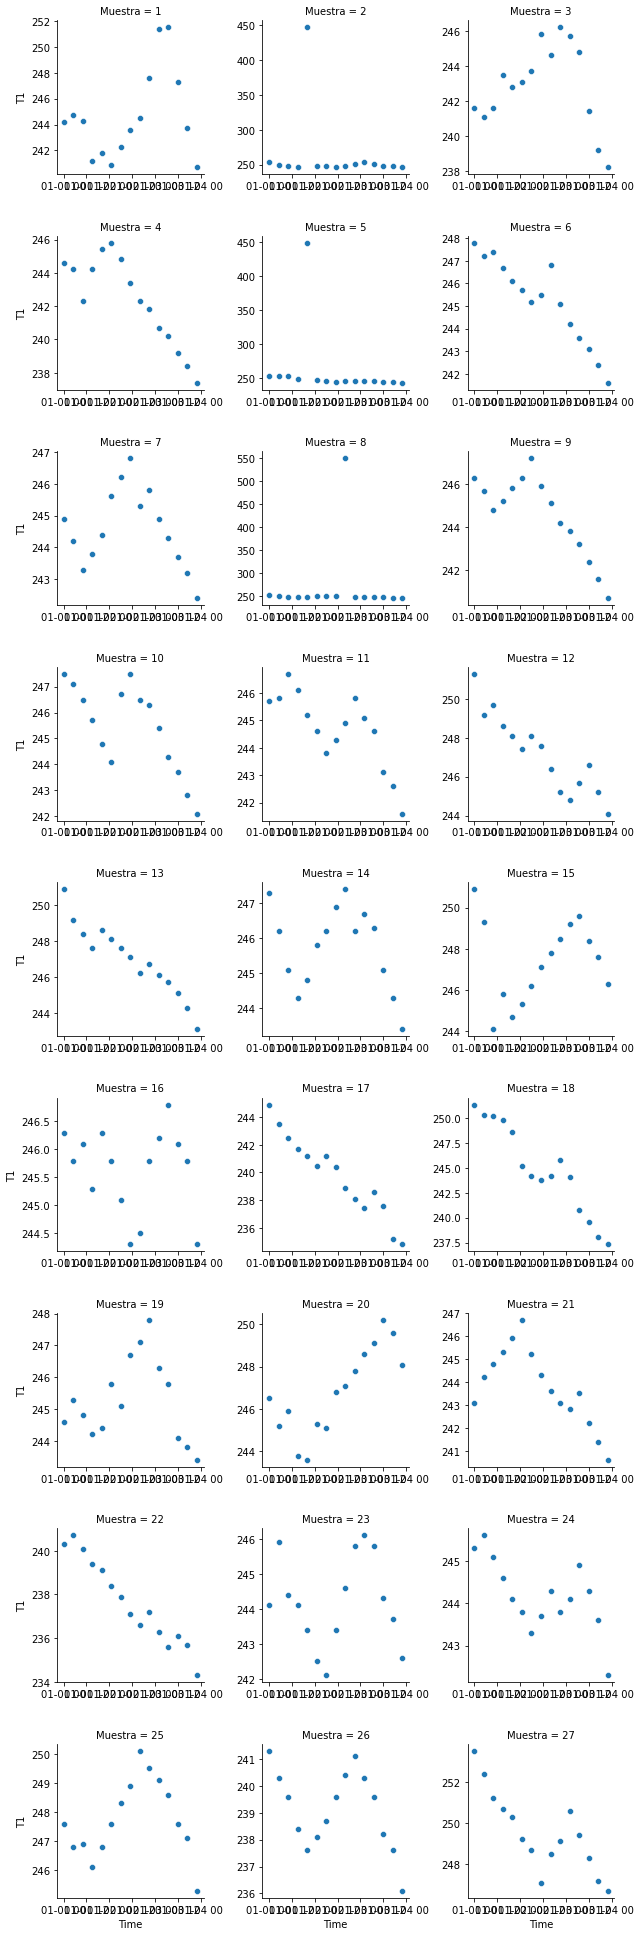

In [18]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='395 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

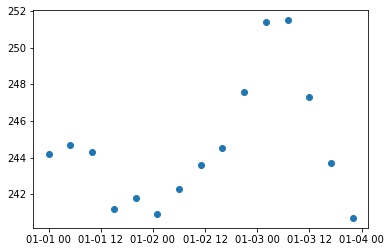

In [42]:
filtered= df[(df['UV']=='395 nm')&(df['Muestra']==1)]

plt.plot(filtered["Time"], filtered["T1"], 'o')